In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.stattools import jarque_bera
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr
import scipy.stats as stats

In [20]:
np.random.seed(321)

In [24]:
POPULATION_MU = 100
POPULATION_SIGMA = 25

sample_sizes = [5,25,100,500]

[print('sample size', i, 'mean', np.mean(np.random.normal(POPULATION_MU, POPULATION_SIGMA, i)), 'std', np.std(np.random.normal(POPULATION_MU, POPULATION_SIGMA, i))) for i in sample_sizes]

'as sample size increases, the mean and std deviation approaches population parameters, however even at a very high sample level, the mean is still not the same as the population mean'

sample size 5 mean 101.1268488936014 std 25.200013001605587
sample size 25 mean 102.35647015523105 std 25.54011626468788
sample size 100 mean 99.90512757474626 std 25.292583388704223
sample size 500 mean 99.29467664694056 std 24.85601113556354


'as sample size increases, the mean and std deviation approaches population parameters, however even at a very high sample level, the mean is still not the same as the population mean'

In [25]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]

[print(np.mean(i)) for i in (X,Y,Z)]

25.0
24.686274509803923
25.607843137254903


[None, None, None]

0.21602637949153217 0.25028131217047933 0.8669070017626075


'even though the mean for the 3 distributions are almost the same, the distributions look very different in reality'

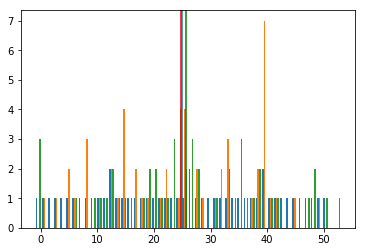

In [40]:
_,x_pvalue,_,_ = jarque_bera(X)
_,y_pvalue,_,_ = jarque_bera(Y)
_,z_pvalue,_,_ = jarque_bera(Z)

print(x_pvalue, y_pvalue, z_pvalue)

'all distributions are likely not normal'

_,a = plt.subplots()
a.hist([X, Y, Z], bins=50)
a.axvline(np.mean(X))
a.axvline(np.mean(Y), c='r')
a.axvline(np.mean(Z), c='g')

'even though the mean for the 3 distributions are almost the same, the distributions look very different in reality'

In [46]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree) / np.std(asset - riskfree)

treasury_ret =  pdr.data.DataReader('BIL', data_source='yahoo', start=datetime(2010,1,1), end=datetime(2015,1,1)).iloc[:, -1].pct_change()[1:]
pricing = pdr.data.DataReader('THO', data_source='yahoo', start=datetime(2010,1,1), end=datetime(2015,1,1)).iloc[:, -1]
returns = pricing.pct_change()[1:,]

running_sharpe_50 = [sharpe_ratio(returns[i-50:len(returns)], treasury_ret[i-50:len(treasury_ret)]) for i in range(50, len(returns))]
running_sharpe_150 = [sharpe_ratio(returns[i-150:len(returns)], treasury_ret[i-150:len(treasury_ret)]) for i in range(150, len(returns))]
running_sharpe_300 = [sharpe_ratio(returns[i-300:len(returns)], treasury_ret[i-300:len(treasury_ret)]) for i in range(300, len(returns))]

print('mean', np.mean(running_sharpe_50[:-200]), 'std', np.std(running_sharpe_50[:-200]))
print('mean', np.mean(running_sharpe_150[:-200]), 'std', np.std(running_sharpe_150[:-200]))
print('mean', np.mean(running_sharpe_300[:-200]), 'std', np.std(running_sharpe_300[:-200]))


mean 0.04839151970035436 std 0.016565690519823137
mean 0.05138001873219834 std 0.014306936100368817
mean 0.05055249978186614 std 0.01329203354363544


'increasing the time period of the window decreases the variability'

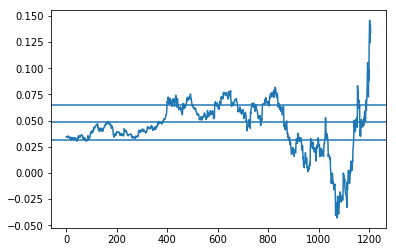

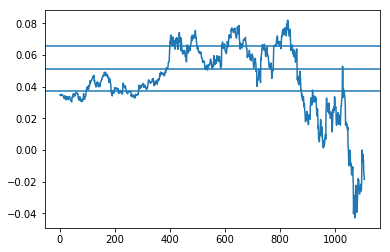

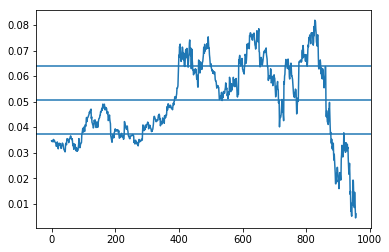

In [53]:
_, a1 = plt.subplots()

a1.plot(running_sharpe_50)
a1.axhline(np.mean(running_sharpe_50[:-200]))
a1.axhline(np.mean(running_sharpe_50[:-200]) + np.std(running_sharpe_50[:-200]))
a1.axhline(np.mean(running_sharpe_50[:-200]) - np.std(running_sharpe_50[:-200]))

_, a2 = plt.subplots()

a2.plot(running_sharpe_150)
a2.axhline(np.mean(running_sharpe_150[:-200]))
a2.axhline(np.mean(running_sharpe_150[:-200]) + np.std(running_sharpe_150[:-200]))
a2.axhline(np.mean(running_sharpe_150[:-200]) - np.std(running_sharpe_150[:-200]))

_, a3 = plt.subplots()

a3.plot(running_sharpe_300)
a3.axhline(np.mean(running_sharpe_300[:-200]))
a3.axhline(np.mean(running_sharpe_300[:-200]) + np.std(running_sharpe_300[:-200]))
a3.axhline(np.mean(running_sharpe_300[:-200]) - np.std(running_sharpe_300[:-200]))

'increasing the time period of the window decreases the variability'

In [66]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

print(np.mean(b15_df.loc[:,'Weekly Avg Temp']))
print(np.std(b15_df.loc[:,'Weekly Avg Temp']))

49.07692307692308
22.983979498978574


In [67]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

print(np.mean(p15_df.loc[:,'Weekly Avg Temp']))
print(np.std(p15_df.loc[:,'Weekly Avg Temp']))

59.78846153846154
7.974325480183593


20.810650887573964
7.208579881656803


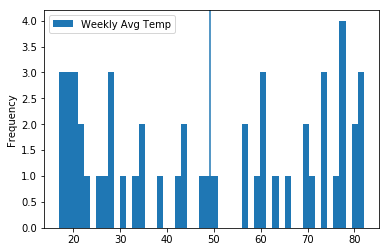

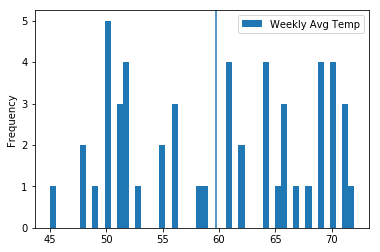

In [87]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

b16_df.plot.hist(bins=50)
plt.axvline(np.mean(b15_df.loc[:,'Weekly Avg Temp']))

p16_df.plot.hist(bins=50)
plt.axvline(np.mean(p15_df.loc[:,'Weekly Avg Temp']))

print(np.mean(abs(b16_df.loc[:,'Weekly Avg Temp'] - np.mean(b15_df.loc[:,'Weekly Avg Temp']))))
print(np.mean(abs(p16_df.loc[:,'Weekly Avg Temp'] - np.mean(p15_df.loc[:,'Weekly Avg Temp']))))